In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, StackingClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]
df = pd.read_csv(url, header=None, names=columns)
df.replace('?', pd.NA, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')
imputer = SimpleImputer(strategy='mean')
df = pd.DataFrame(imputer.fit_transform(df), columns=columns)
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)

In [5]:
X = df.drop('target', axis=1)
y = df['target']

In [6]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [7]:
clf = RandomForestClassifier(random_state=42)
rfe = RFE(estimator=clf, n_features_to_select=5)
rfe.fit(X, y)
selected_features = rfe.support_
X_selected = X[:, selected_features]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train_selected, X_test_selected, _, _ = train_test_split(X_selected, y, test_size=0.3, random_state=42)

In [9]:
clf_all = RandomForestClassifier(random_state=42)
clf_all.fit(X_train, y_train)
y_pred_all = clf_all.predict(X_test)
y_pred_prob_all = clf_all.predict_proba(X_test)[:, 1]
accuracy_all = accuracy_score(y_test, y_pred_all)
roc_auc_all = roc_auc_score(y_test, y_pred_prob_all)
cm_all = confusion_matrix(y_test, y_pred_all)

In [10]:
clf_selected = RandomForestClassifier(random_state=42)
clf_selected.fit(X_train_selected, y_train)
y_pred_selected = clf_selected.predict(X_test_selected)
y_pred_prob_selected = clf_selected.predict_proba(X_test_selected)[:, 1]
accuracy_selected = accuracy_score(y_test, y_pred_selected)
roc_auc_selected = roc_auc_score(y_test, y_pred_prob_selected)
cm_selected = confusion_matrix(y_test, y_pred_selected)

In [11]:
clf_ada = AdaBoostClassifier(random_state=42)
clf_ada.fit(X_train, y_train)
y_pred_ada = clf_ada.predict(X_test)
y_pred_prob_ada = clf_ada.predict_proba(X_test)[:, 1]
accuracy_ada = accuracy_score(y_test, y_pred_ada)
roc_auc_ada = roc_auc_score(y_test, y_pred_prob_ada)
cm_ada = confusion_matrix(y_test, y_pred_ada)

In [12]:
clf_bag = BaggingClassifier(random_state=42)
clf_bag.fit(X_train, y_train)
y_pred_bag = clf_bag.predict(X_test)
y_pred_prob_bag = clf_bag.predict_proba(X_test)[:, 1]
accuracy_bag = accuracy_score(y_test, y_pred_bag)
roc_auc_bag = roc_auc_score(y_test, y_pred_prob_bag)
cm_bag = confusion_matrix(y_test, y_pred_bag)

In [13]:
estimators = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('svm', SVC(probability=True, random_state=42)),
    ('knn', KNeighborsClassifier())
]
clf_stack = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(), cv=5)
clf_stack.fit(X_train, y_train)
y_pred_stack = clf_stack.predict(X_test)
y_pred_prob_stack = clf_stack.predict_proba(X_test)[:, 1]
accuracy_stack = accuracy_score(y_test, y_pred_stack)
roc_auc_stack = roc_auc_score(y_test, y_pred_prob_stack)
cm_stack = confusion_matrix(y_test, y_pred_stack)

In [14]:
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)
y_pred_knn = clf_knn.predict(X_test)
y_pred_prob_knn = clf_knn.predict_proba(X_test)[:, 1]
accuracy_knn = accuracy_score(y_test, y_pred_knn)
roc_auc_knn = roc_auc_score(y_test, y_pred_prob_knn)
cm_knn = confusion_matrix(y_test, y_pred_knn)

In [15]:
print("All Features - Accuracy:", accuracy_all)
print("All Features - ROC AUC:", roc_auc_all)
print("\nAll Features - Classification Report:\n", classification_report(y_test, y_pred_all))

print("Selected Features - Accuracy:", accuracy_selected)
print("Selected Features - ROC AUC:", roc_auc_selected)
print("\nSelected Features - Classification Report:\n", classification_report(y_test, y_pred_selected))

print("AdaBoost - Accuracy:", accuracy_ada)
print("AdaBoost - ROC AUC:", roc_auc_ada)
print("\nAdaBoost - Classification Report:\n", classification_report(y_test, y_pred_ada))

print("Bagging - Accuracy:", accuracy_bag)
print("Bagging - ROC AUC:", roc_auc_bag)
print("\nBagging - Classification Report:\n", classification_report(y_test, y_pred_bag))

print("Stacking - Accuracy:", accuracy_stack)
print("Stacking - ROC AUC:", roc_auc_stack)
print("\nStacking - Classification Report:\n", classification_report(y_test, y_pred_stack))

print("KNN - Accuracy:", accuracy_knn)
print("KNN - ROC AUC:", roc_auc_knn)
print("\nKNN - Classification Report:\n", classification_report(y_test, y_pred_knn))

All Features - Accuracy: 0.8351648351648352
All Features - ROC AUC: 0.9125484496124031

All Features - Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.85        48
           1       0.83      0.81      0.82        43

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.84        91

Selected Features - Accuracy: 0.8571428571428571
Selected Features - ROC AUC: 0.9110949612403101

Selected Features - Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86        48
           1       0.84      0.86      0.85        43

    accuracy                           0.86        91
   macro avg       0.86      0.86      0.86        91
weighted avg       0.86      0.86      0.86        91

AdaBoost - Accuracy: 0.7362637362637363
AdaBoost - ROC AUC: 0.762839147286821

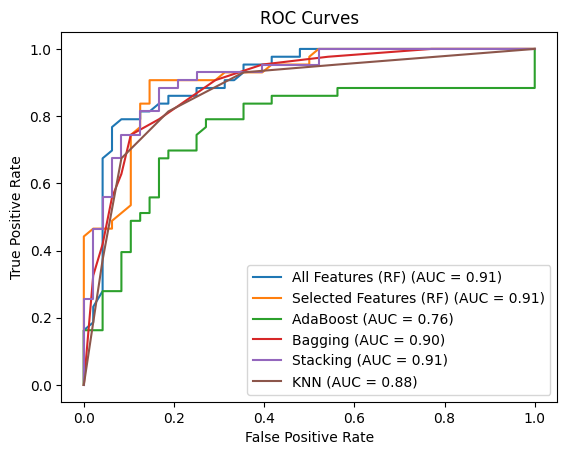

In [21]:
plt.figure()
plt.plot(*roc_curve(y_test, y_pred_prob_all)[:2], label=f'All Features (RF) (AUC = {roc_auc_all:.2f})')
plt.plot(*roc_curve(y_test, y_pred_prob_selected)[:2], label=f'Selected Features (RF) (AUC = {roc_auc_selected:.2f})')
plt.plot(*roc_curve(y_test, y_pred_prob_ada)[:2], label=f'AdaBoost (AUC = {roc_auc_ada:.2f})')
plt.plot(*roc_curve(y_test, y_pred_prob_bag)[:2], label=f'Bagging (AUC = {roc_auc_bag:.2f})')
plt.plot(*roc_curve(y_test, y_pred_prob_stack)[:2], label=f'Stacking (AUC = {roc_auc_stack:.2f})')
plt.plot(*roc_curve(y_test, y_pred_prob_knn)[:2], label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.show()

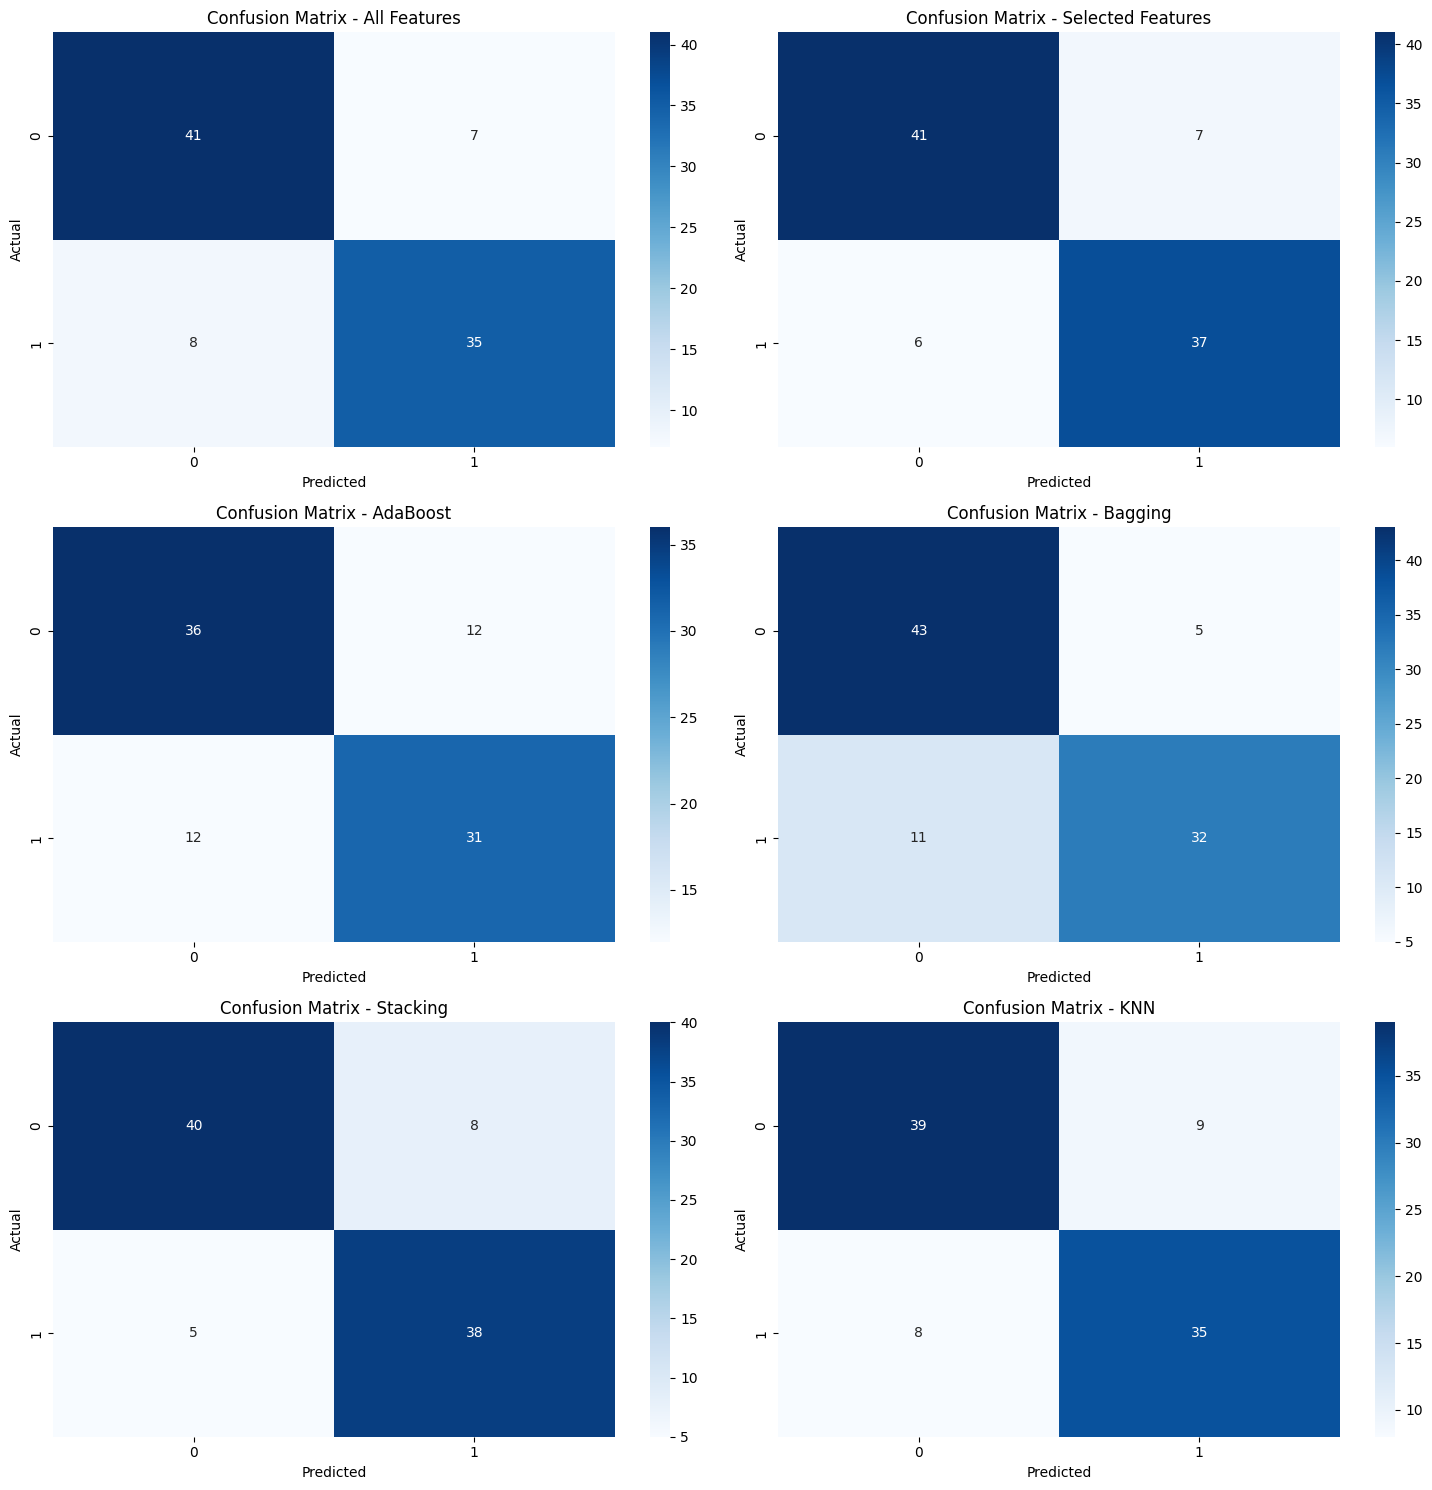

In [17]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

sns.heatmap(cm_all, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title('Confusion Matrix - All Features')
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('Actual')

sns.heatmap(cm_selected, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1])
axes[0, 1].set_title('Confusion Matrix - Selected Features')
axes[0, 1].set_xlabel('Predicted')
axes[0, 1].set_ylabel('Actual')

sns.heatmap(cm_ada, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0])
axes[1, 0].set_title('Confusion Matrix - AdaBoost')
axes[1, 0].set_xlabel('Predicted')
axes[1, 0].set_ylabel('Actual')

sns.heatmap(cm_bag, annot=True, fmt='d', cmap='Blues', ax=axes[1, 1])
axes[1, 1].set_title('Confusion Matrix - Bagging')
axes[1, 1].set_xlabel('Predicted')
axes[1, 1].set_ylabel('Actual')

sns.heatmap(cm_stack, annot=True, fmt='d', cmap='Blues', ax=axes[2, 0])
axes[2, 0].set_title('Confusion Matrix - Stacking')
axes[2, 0].set_xlabel('Predicted')
axes[2, 0].set_ylabel('Actual')

sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', ax=axes[2, 1])
axes[2, 1].set_title('Confusion Matrix - KNN')
axes[2, 1].set_xlabel('Predicted')
axes[2, 1].set_ylabel('Actual')

plt.tight_layout()
plt.show()

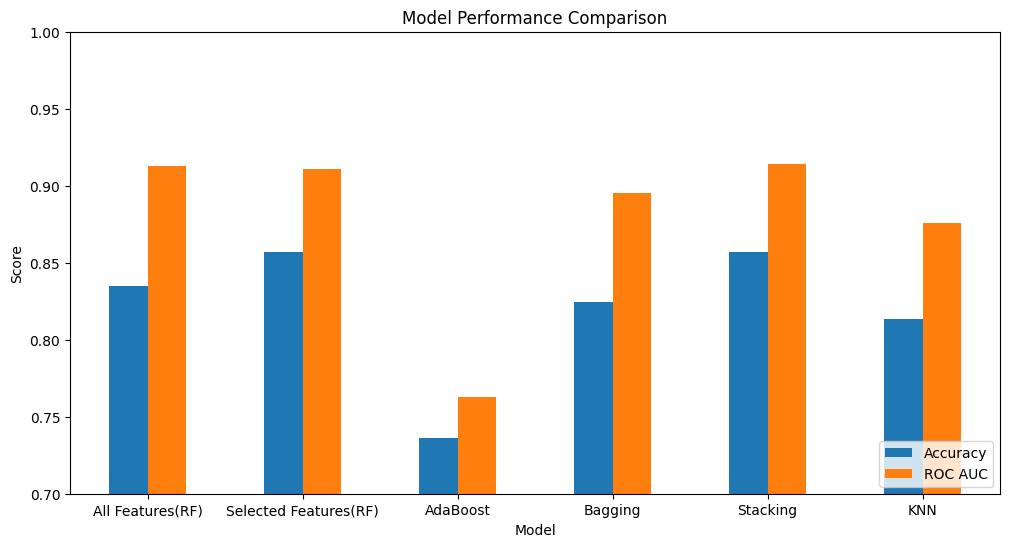

In [20]:
results = pd.DataFrame({
    'Model': ['All Features(RF)', 'Selected Features(RF)', 'AdaBoost', 'Bagging', 'Stacking', 'KNN'],
    'Accuracy': [accuracy_all, accuracy_selected, accuracy_ada, accuracy_bag, accuracy_stack, accuracy_knn],
    'ROC AUC': [roc_auc_all, roc_auc_selected, roc_auc_ada, roc_auc_bag, roc_auc_stack, roc_auc_knn]
})
results.set_index('Model', inplace=True)
results.plot(kind='bar', figsize=(12, 6), ylim=(0.7, 1.0))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()